In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [48]:
file_path = 'results/results.csv'
data = pd.read_csv(file_path)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Filtering out rows where latency or energy is infinity
data = data[(data['latency'] != float('inf')) & (data['energy'] != float('inf'))]

raw_data = data.copy()

# Scale energy and latency for each configuration
for config in data['config'].unique():
    # Extract rows for the current configuration
    config_data = data[data['config'] == config]

    # Scale energy and latency
    data.loc[data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_data = data[data['generations'] == 200].copy()
gen_200_raw_data = raw_data[raw_data['generations'] == 200].copy()

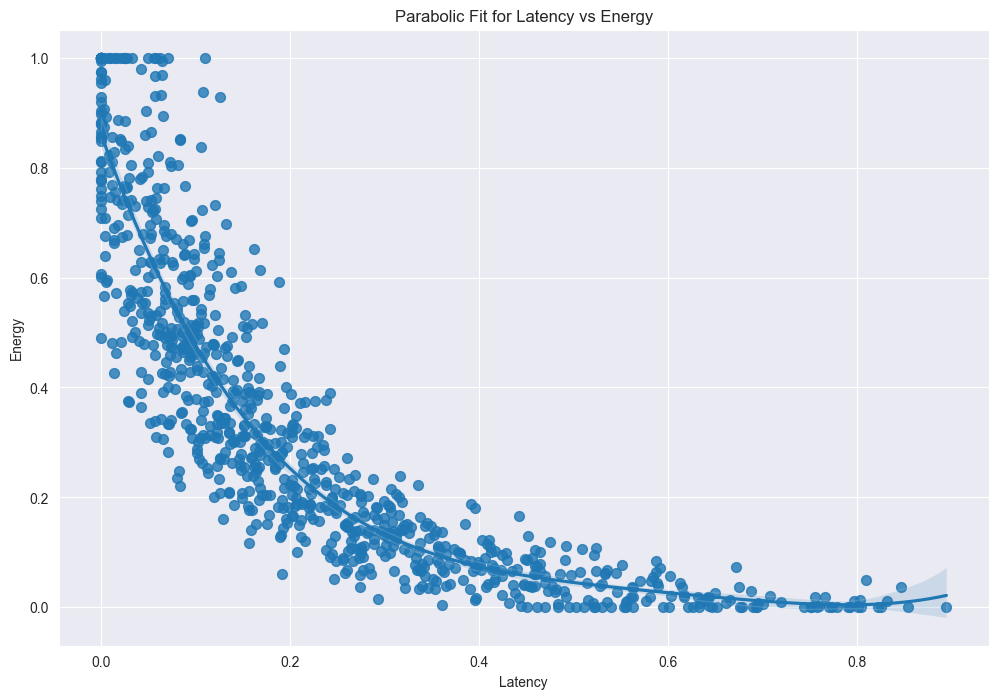

In [49]:
# Creating a scatter plot with a linear regression line for the newest data
plt.figure(figsize=(12, 8))
sns.regplot(x='latency', y='energy', data=gen_200_data, order=4, scatter_kws={'s':50})
title = 'Parabolic Fit for Latency vs Energy'
plt.title(title)
plt.xlabel('Latency')
plt.ylabel('Energy')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

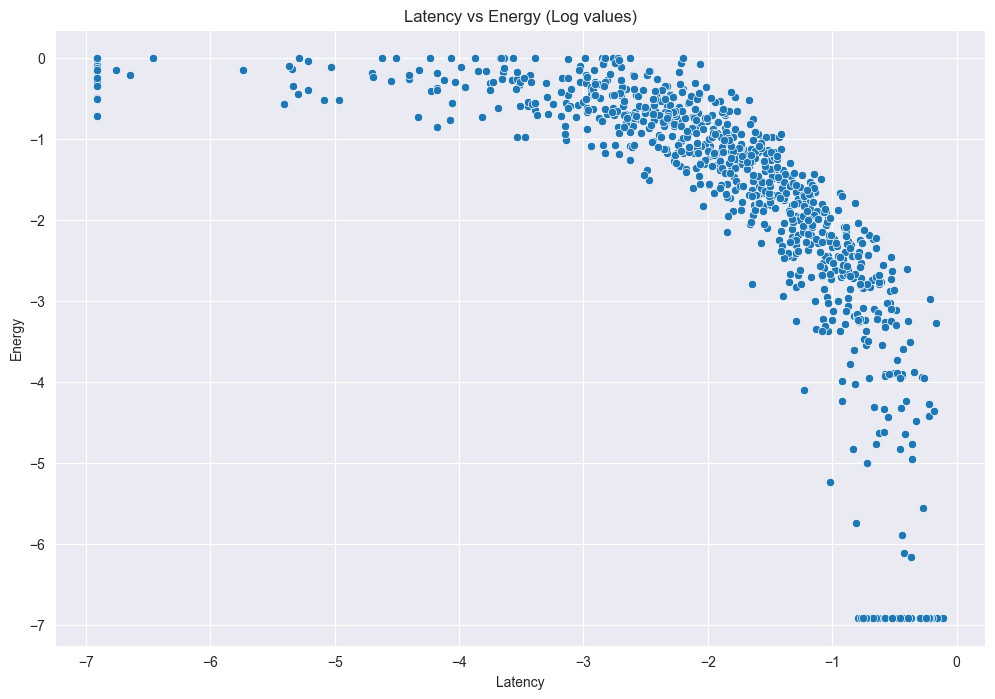

In [50]:
import numpy as np

# include delta to mitigate log(0) issue.
delta = 0.001

gen_200_data['ln_latency'] = np.log(gen_200_data['latency'] + delta)
gen_200_data['ln_energy'] = np.log(gen_200_data['energy'] + delta)
# Creating a scatter plot with a linear regression line for the newest data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ln_latency', y='ln_energy', data=gen_200_data)
title = 'Latency vs Energy (Log values)'
plt.title(title)
plt.xlabel('Latency')
plt.ylabel('Energy')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

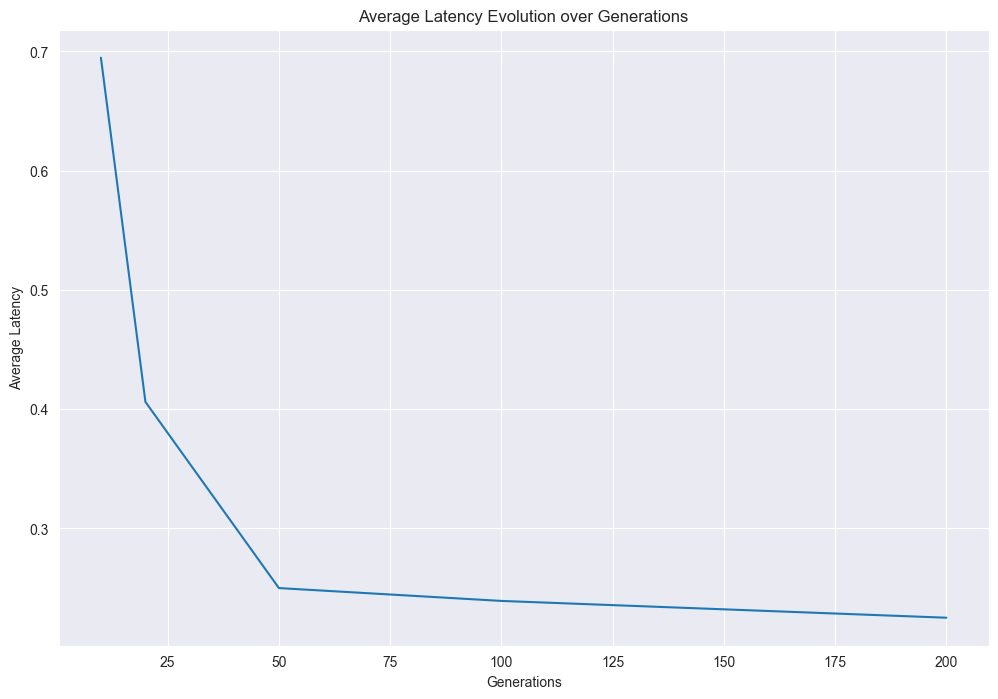

In [51]:
# Calculating the average latency for each generation
avg_latency_per_generation = data.groupby('generations')['latency'].mean().reset_index()

# Creating a line chart to show how latency evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='latency', data=avg_latency_per_generation)
title = 'Average Latency Evolution over Generations'
plt.title(title)
plt.xlabel('Generations')
plt.ylabel('Average Latency')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

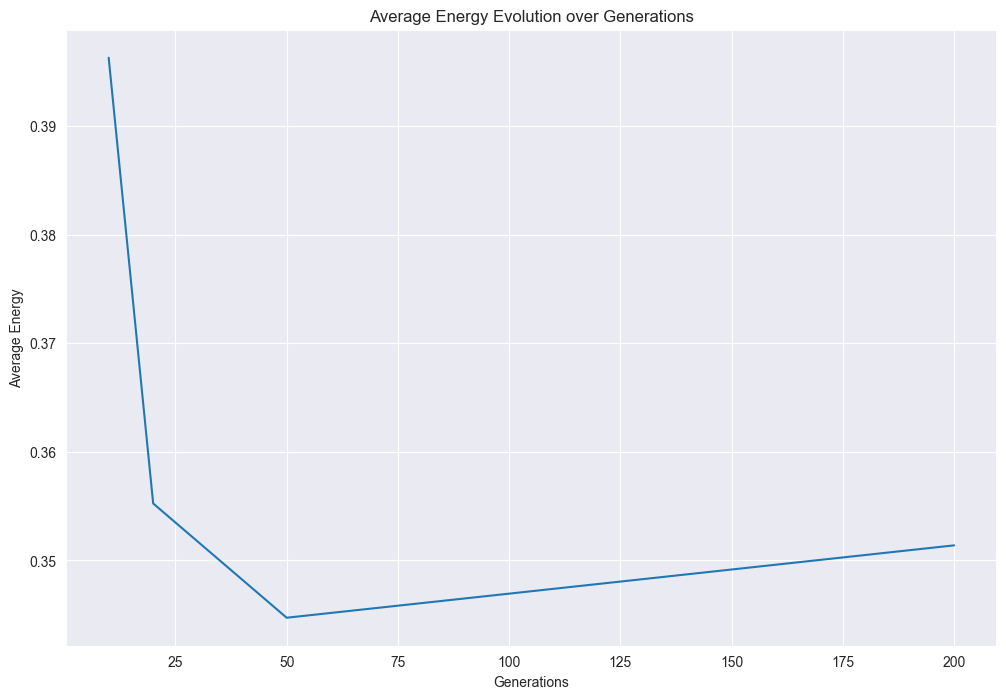

In [52]:
# Calculating the average energy for each generation
avg_energy_per_generation = data.groupby('generations')['energy'].mean().reset_index()

# Creating a line chart to show how energy evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='energy', data=avg_energy_per_generation)
title = 'Average Energy Evolution over Generations'
plt.title(title)
plt.xlabel('Generations')
plt.ylabel('Average Energy')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

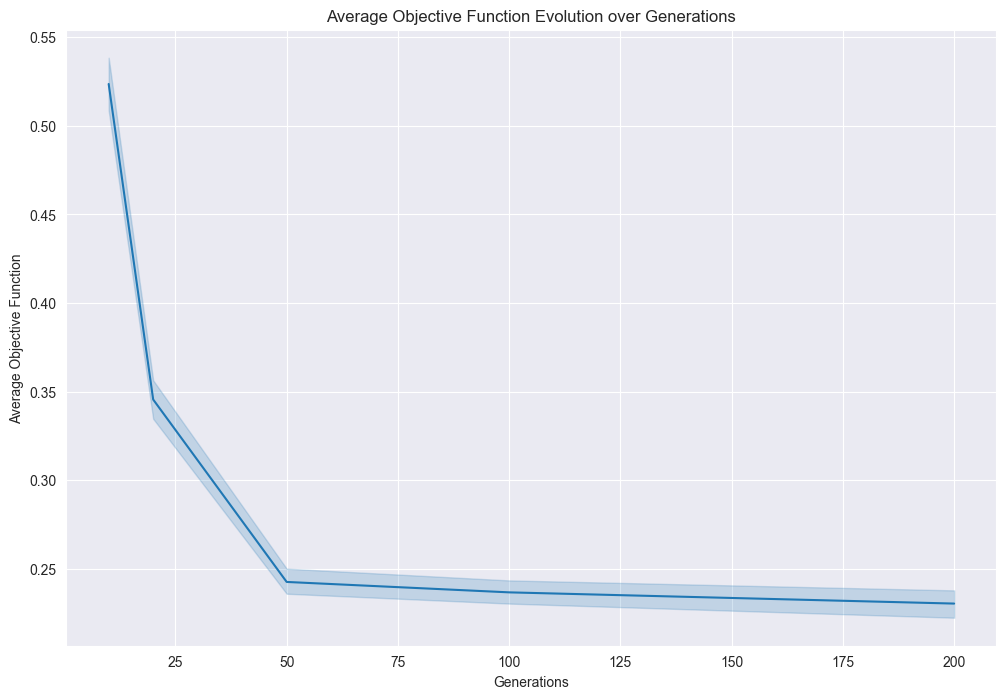

In [53]:
# Creating a line chart to show how energy evolves over generations
alpha_beta_median_data = data[(data['alpha'] == 0.5) & (data['beta'] == 0.5)].copy()
alpha_beta_median_data['objective_func'] = alpha_beta_median_data['energy'] * 0.5 + alpha_beta_median_data['latency'] * 0.5
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='objective_func', data=alpha_beta_median_data)
title = 'Average Objective Function Evolution over Generations'
plt.title(title)
plt.xlabel('Generations')
plt.ylabel('Average Objective Function')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

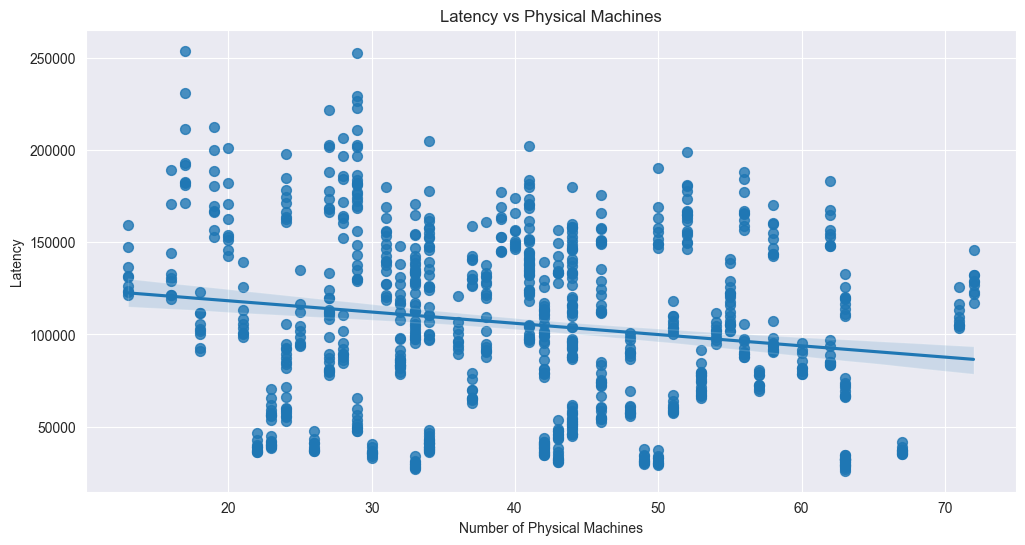

In [54]:
# Latency vs physical_machines
plt.figure(figsize=(12, 6))
sns.regplot(x='physical_machines', y='latency', data=gen_200_raw_data, scatter_kws={'s':50})
title = 'Latency vs Physical Machines'
plt.title(title)
plt.xlabel('Number of Physical Machines')
plt.ylabel('Latency')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

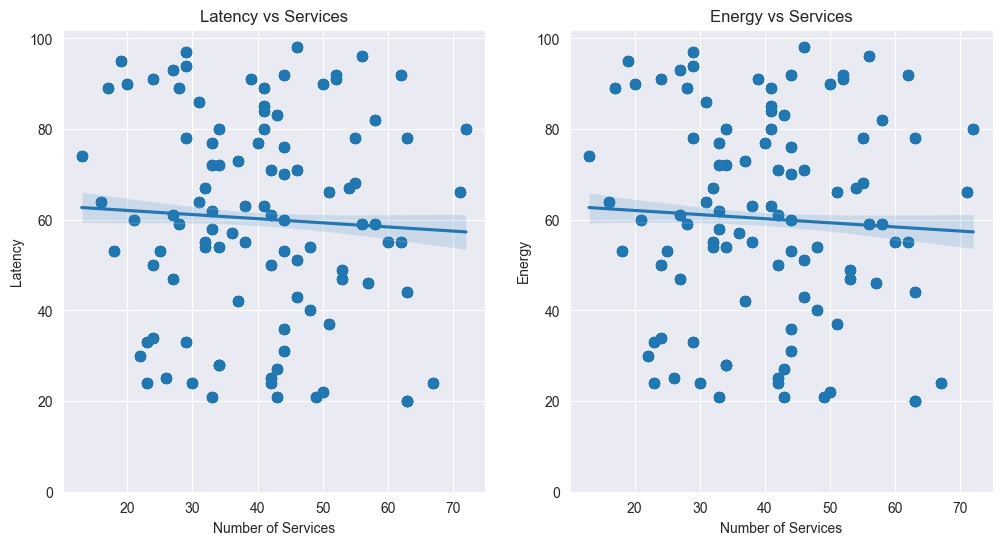

In [55]:
# Latency vs physical_machines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='physical_machines', y='services', data=gen_200_raw_data, scatter_kws={'s':50})
title = 'Latency vs Services'
plt.title(title)
plt.xlabel('Number of Services')
plt.ylabel('Latency')
plt.ylim(ymin=0)

plt.subplot(1, 2, 2)
sns.regplot(x='physical_machines', y='services', data=gen_200_raw_data, scatter_kws={'s':50})
title = 'Energy vs Services'
plt.title(title)
plt.xlabel('Number of Services')
plt.ylabel('Energy')
plt.ylim(ymin=0)
title = 'Latency and Energy vs Services'
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

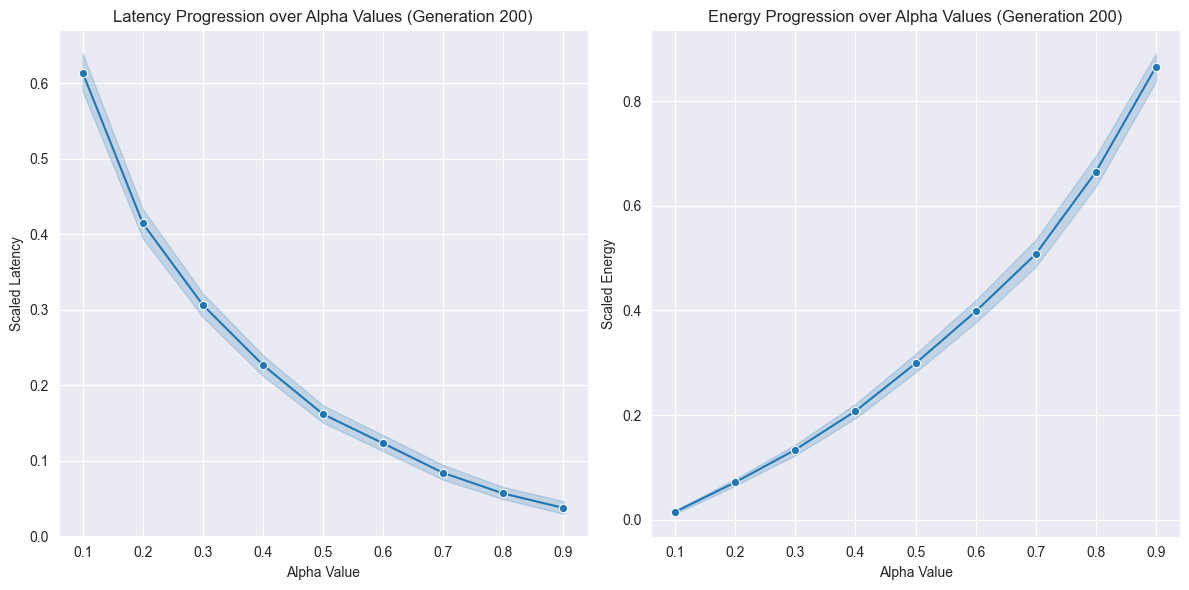

In [56]:
# Line chart for Latency over alpha values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='alpha', y='latency', data=gen_200_data, marker='o')
title = 'Latency Progression over Alpha Values (Generation 200)'
plt.title(title)
plt.xlabel('Alpha Value')
plt.ylabel('Scaled Latency')

# Line chart for Energy over alpha values
plt.subplot(1, 2, 2)
sns.lineplot(x='alpha', y='energy', data=gen_200_data, marker='o')
title = 'Energy Progression over Alpha Values (Generation 200)'
plt.title(title)
plt.xlabel('Alpha Value')
plt.ylabel('Scaled Energy')
plt.tight_layout()
title = 'Latency and Energy Progression over Alpha'
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

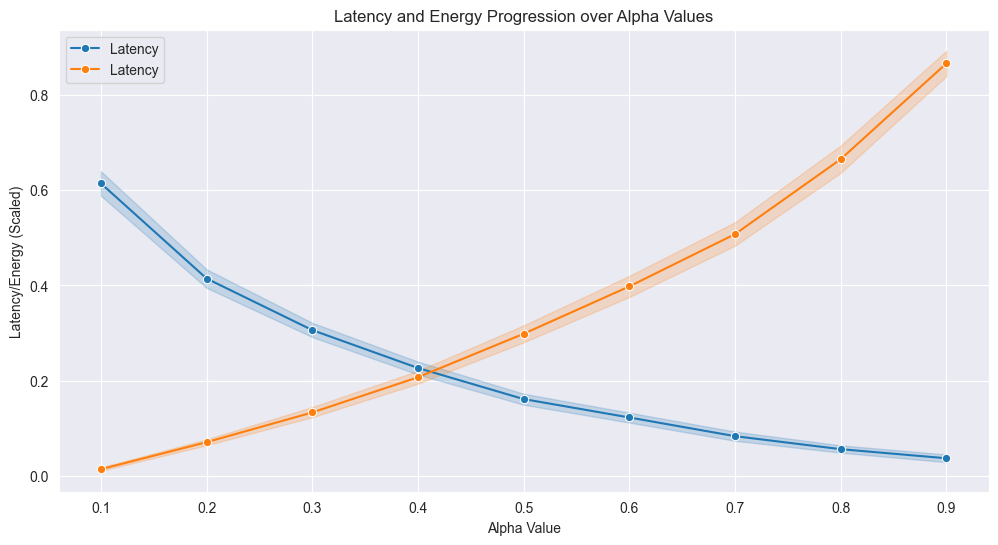

In [58]:
# Line chart for Latency over alpha values
plt.figure(figsize=(12, 6))
sns.lineplot(x='alpha', y='latency', data=gen_200_data, label='Latency', marker='o')
sns.lineplot(x='alpha', y='energy', data=gen_200_data, label='Latency', marker='o')
title = 'Latency and Energy Progression over Alpha Values'
plt.title(title)
plt.xlabel('Alpha Value')
plt.ylabel('Latency/Energy (Scaled)')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

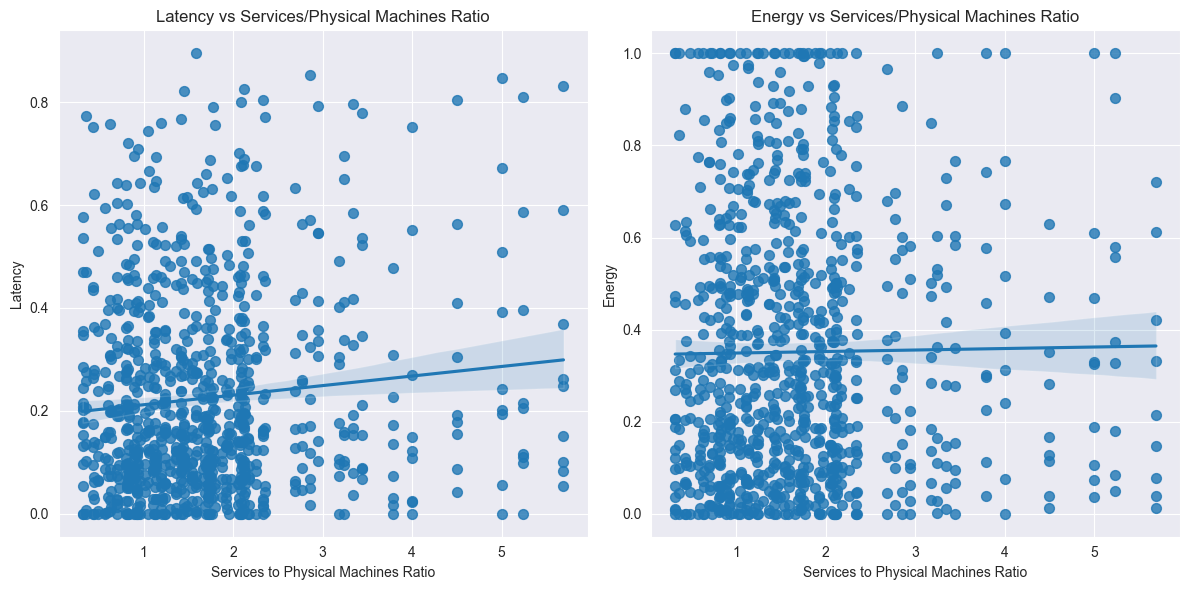

In [59]:
# Calculate the ratio of services to physical machines
gen_200_data['services_to_physical_ratio'] = gen_200_data['services'] / gen_200_data['physical_machines']

plt.figure(figsize=(12, 6))

# Plotting Latency vs Services/Physical Machines Ratio
plt.subplot(1, 2, 1)
sns.regplot(x='services_to_physical_ratio', y='latency', data=gen_200_data, scatter_kws={'s':50})
title = 'Latency vs Services/Physical Machines Ratio'
plt.title(title)
plt.xlabel('Services to Physical Machines Ratio')
plt.ylabel('Latency')

# Plotting Energy vs Services/Physical Machines Ratio
plt.subplot(1, 2, 2)
sns.regplot(x='services_to_physical_ratio', y='energy', data=gen_200_data, scatter_kws={'s':50})
title = 'Energy vs Services/Physical Machines Ratio'
plt.title(title)
plt.xlabel('Services to Physical Machines Ratio')
plt.ylabel('Energy')

plt.tight_layout()
title = 'Latency and Energy over Ratio'
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

In [60]:
file_path = 'results/results_cloud.csv'
cloud_data = pd.read_csv(file_path)

# Filtering out rows where latency or energy is infinity
cloud_data = cloud_data[(cloud_data['latency'] != float('inf')) & (cloud_data['energy'] != float('inf'))]

raw_cloud_data = cloud_data.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale energy and latency for each configuration
for config in cloud_data['config'].unique():
    # Extract rows for the current configuration
    config_data = cloud_data[cloud_data['config'] == config]

    # Scale energy and latency
    cloud_data.loc[cloud_data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_cloud_data = cloud_data[cloud_data['generations'] == 200].copy()
gen_200_raw_cloud_data = raw_cloud_data[raw_cloud_data['generations'] == 200].copy()

In [61]:
file_path = 'results/results_edge.csv'
edge_data = pd.read_csv(file_path)

# Filtering out rows where latency or energy is infinity
edge_data = edge_data[(edge_data['latency'] != float('inf')) & (edge_data['energy'] != float('inf'))]

raw_edge_data = edge_data.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale energy and latency for each configuration
for config in edge_data['config'].unique():
    # Extract rows for the current configuration
    config_data = edge_data[edge_data['config'] == config]

    # Scale energy and latency
    edge_data.loc[edge_data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_edge_data = edge_data[edge_data['generations'] == 200].copy()
gen_200_raw_edge_data = raw_edge_data[raw_edge_data['generations'] == 200].copy()

In [62]:
# Merging the three dataframes on the 'config' column
combined_data = pd.merge(gen_200_data[['config', 'services', 'alpha', 'beta', 'latency', 'energy', 'is_perfect']],
                         gen_200_cloud_data[['config', 'alpha', 'beta', 'latency', 'energy', 'is_perfect']],
                         on=['config', 'alpha', 'beta'], suffixes=('', '_cloud'))

combined_data = pd.merge(combined_data,
                         gen_200_edge_data[['config', 'services', 'alpha', 'beta', 'latency', 'energy', 'is_perfect']],
                         on=['config', 'alpha', 'beta'], suffixes=('', '_edge'))

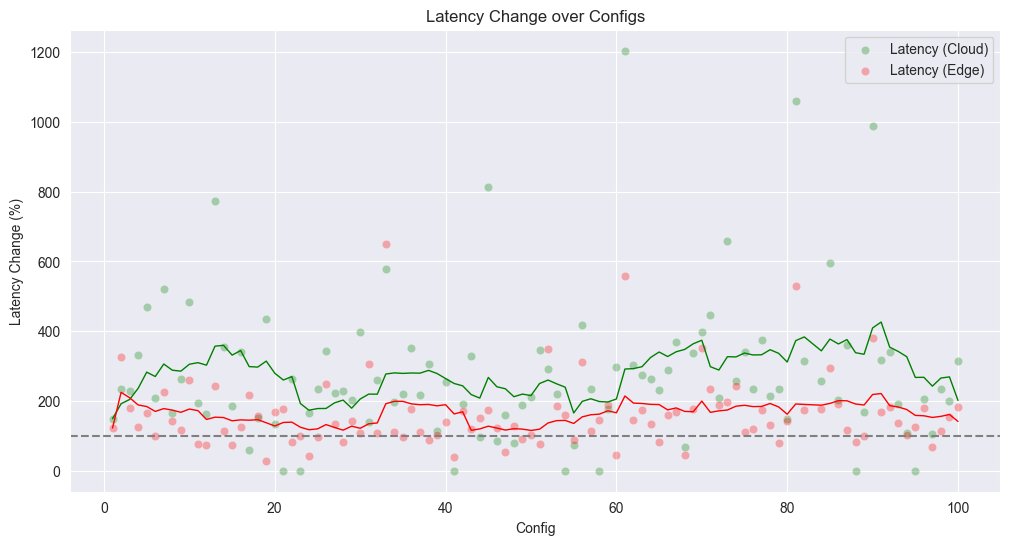

In [63]:
# Filtering the data for alpha = 0.5 and beta = 0.5
alpha_beta_filtered_data = combined_data[(combined_data['alpha'] == 0.5) & (combined_data['beta'] == 0.5)].copy()

# Calculating latency_cloud and latency_edge as a percentage of latency
alpha_beta_filtered_data['latency_cloud_percent'] = (alpha_beta_filtered_data['latency_cloud'] / alpha_beta_filtered_data['latency']) * 100
alpha_beta_filtered_data['latency_edge_percent'] = (alpha_beta_filtered_data['latency_edge'] / alpha_beta_filtered_data['latency']) * 100
temp_filtered_data = alpha_beta_filtered_data[(alpha_beta_filtered_data['latency_cloud_percent'] < 1250) & (alpha_beta_filtered_data['latency_edge_percent'] < 1250)].copy()

# Extracting config number from the 'config' column
temp_filtered_data['config_number'] = temp_filtered_data['config'].str.extract('(\d+)').astype(int)

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='latency_cloud_percent', data=temp_filtered_data, label='Latency (Cloud)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='latency_edge_percent', data=temp_filtered_data, label='Latency (Edge)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=temp_filtered_data['latency_cloud_percent'].rolling(window=window_size, min_periods=1).mean(), data=temp_filtered_data, color='green', lw=1)
sns.lineplot(x='config_number', y=temp_filtered_data['latency_edge_percent'].rolling(window=window_size, min_periods=1).mean(), data=temp_filtered_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

title = 'Latency Change over Configs'
plt.title(title)
plt.xlabel('Config')
plt.ylabel('Latency Change (%)')
plt.legend()
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

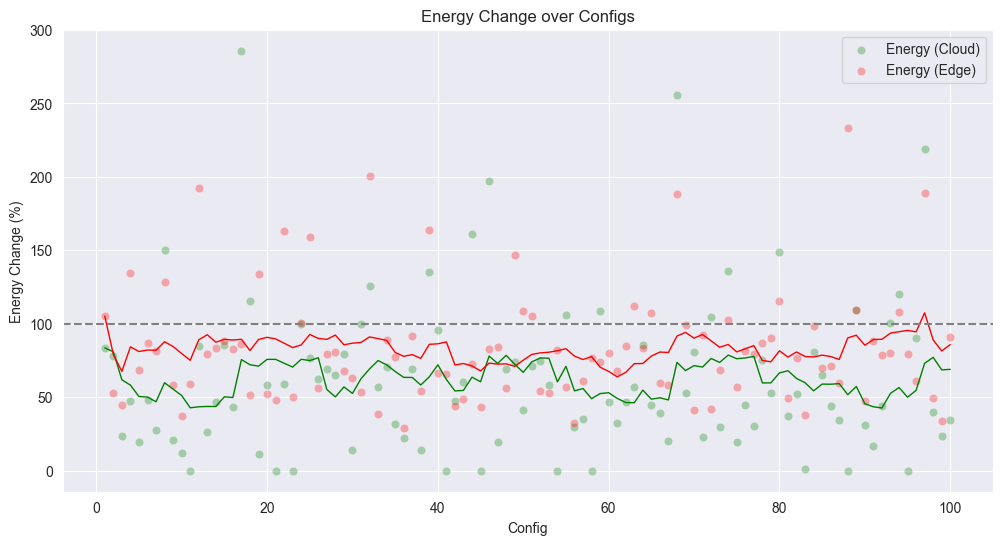

In [64]:
# Calculating energy_cloud and energy_edge as a percentage of energy
alpha_beta_filtered_data['energy_cloud_percent'] = (alpha_beta_filtered_data['energy_cloud'] / alpha_beta_filtered_data['energy']) * 100
alpha_beta_filtered_data['energy_edge_percent'] = (alpha_beta_filtered_data['energy_edge'] / alpha_beta_filtered_data['energy']) * 100

# Extracting config number from the 'config' column
alpha_beta_filtered_data['config_number'] = alpha_beta_filtered_data['config'].str.extract('(\d+)').astype(int)

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='energy_cloud_percent', data=alpha_beta_filtered_data, label='Energy (Cloud)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='energy_edge_percent', data=alpha_beta_filtered_data, label='Energy (Edge)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['energy_cloud_percent'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='green', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['energy_edge_percent'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

title = 'Energy Change over Configs'
plt.title(title)
plt.xlabel('Config')
plt.ylabel('Energy Change (%)')
plt.legend()
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

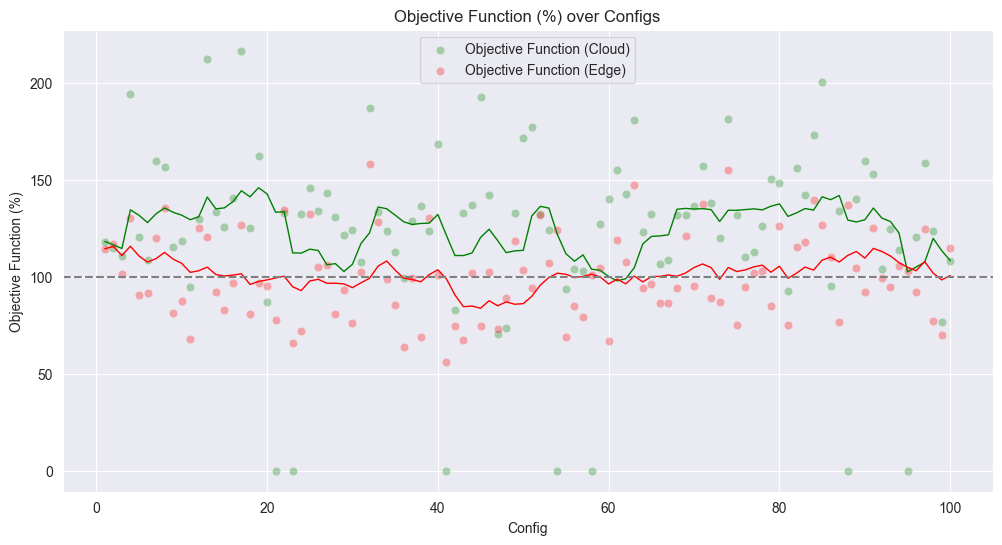

In [65]:
# Calculating objective_cloud and objective_edge as a percentage of objective function
alpha_beta_filtered_data['objective_func'] = alpha_beta_filtered_data['energy'] * 0.5 + alpha_beta_filtered_data['latency'] * 0.5
alpha_beta_filtered_data['objective_cloud'] = alpha_beta_filtered_data['energy_cloud'] * 0.5 + alpha_beta_filtered_data['latency_cloud'] * 0.5
alpha_beta_filtered_data['objective_edge'] = alpha_beta_filtered_data['energy_edge'] * 0.5 + alpha_beta_filtered_data['latency_edge'] * 0.5

alpha_beta_filtered_data['objective_cloud_percent'] = (alpha_beta_filtered_data['objective_cloud'] / alpha_beta_filtered_data['objective_func']) * 100
alpha_beta_filtered_data['objective_edge_percent'] = (alpha_beta_filtered_data['objective_edge'] / alpha_beta_filtered_data['objective_func']) * 100

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='objective_cloud_percent', data=alpha_beta_filtered_data, label='Objective Function (Cloud)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='objective_edge_percent', data=alpha_beta_filtered_data, label='Objective Function (Edge)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['objective_cloud_percent'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='green', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['objective_edge_percent'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

title = 'Objective Function (%) over Configs'
plt.title(title)
plt.xlabel('Config')
plt.ylabel('Objective Function (%)')
plt.legend()
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

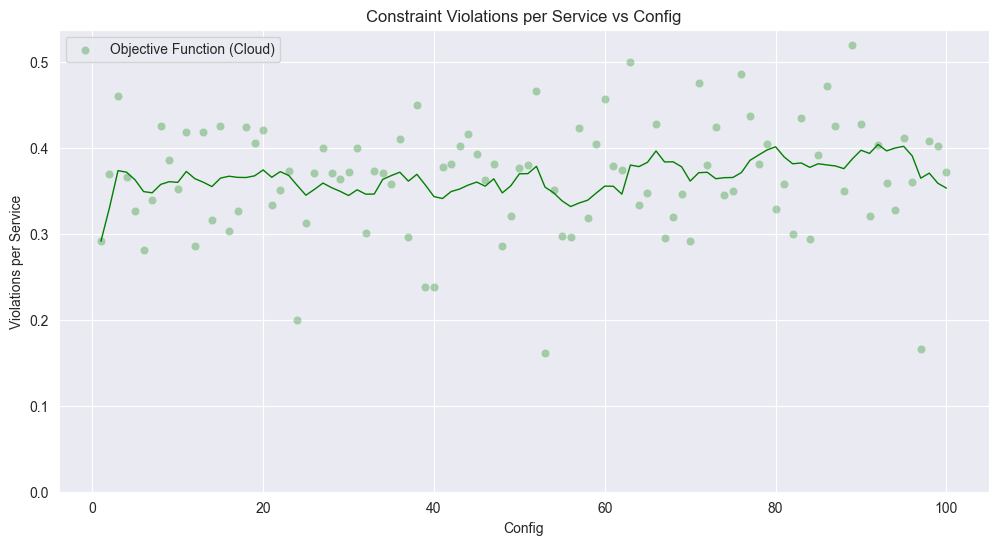

In [66]:
import ast

# Counting the number of False in is_perfect column for each config
alpha_beta_filtered_data['constraint_violations'] = alpha_beta_filtered_data['is_perfect'].apply(lambda x: ast.literal_eval(x).count(False))

# Calculating constraint_violations/services
alpha_beta_filtered_data['violations_per_service'] = alpha_beta_filtered_data['constraint_violations'] / alpha_beta_filtered_data['services']

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='violations_per_service', data=alpha_beta_filtered_data, label='Objective Function (Cloud)', color='green', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['violations_per_service'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='green', lw=1)

title = 'Constraint Violations per Service vs Config'
plt.title(title)
plt.xlabel('Config')
plt.ylabel('Violations per Service')
plt.ylim(ymin=0)
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

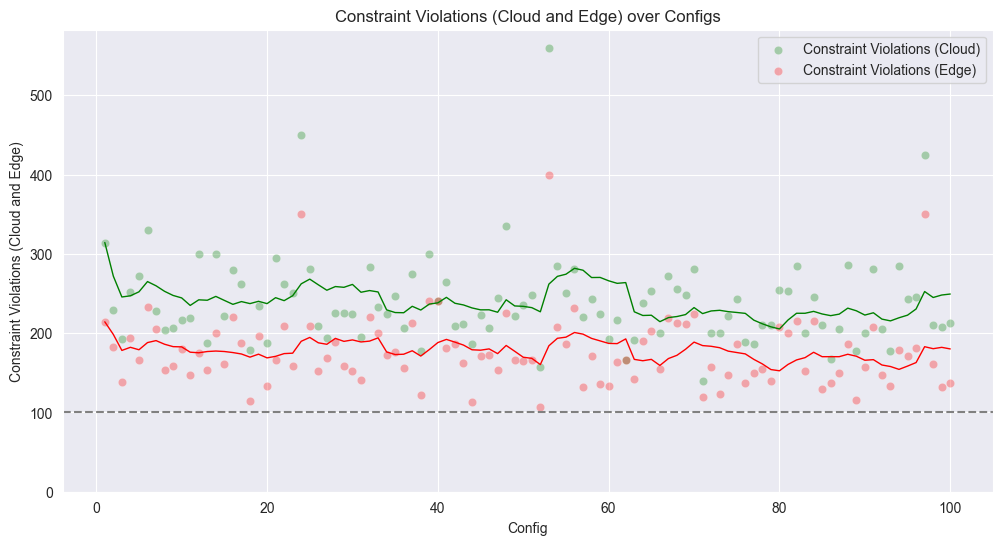

In [67]:
# Counting the number of False in is_perfect column for each config
alpha_beta_filtered_data['constraint_violations_cloud'] = alpha_beta_filtered_data['is_perfect_cloud'].apply(lambda x: ast.literal_eval(x).count(False))
alpha_beta_filtered_data['constraint_violations_edge'] = alpha_beta_filtered_data['is_perfect_edge'].apply(lambda x: ast.literal_eval(x).count(False))

alpha_beta_filtered_data['constraint_violations_cloud_percent'] = (alpha_beta_filtered_data['constraint_violations_cloud'] / alpha_beta_filtered_data['constraint_violations']) * 100
alpha_beta_filtered_data['constraint_violations_edge_percent'] = (alpha_beta_filtered_data['constraint_violations_edge'] / alpha_beta_filtered_data['constraint_violations']) * 100

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='constraint_violations_cloud_percent', data=alpha_beta_filtered_data, label='Constraint Violations (Cloud)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='constraint_violations_edge_percent', data=alpha_beta_filtered_data, label='Constraint Violations (Edge)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['constraint_violations_cloud_percent'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='green', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['constraint_violations_edge_percent'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

title = 'Constraint Violations (Cloud and Edge) over Configs'
plt.title(title)
plt.xlabel('Config')
plt.ylabel('Constraint Violations (Cloud and Edge)')
plt.ylim(ymin=0)
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()

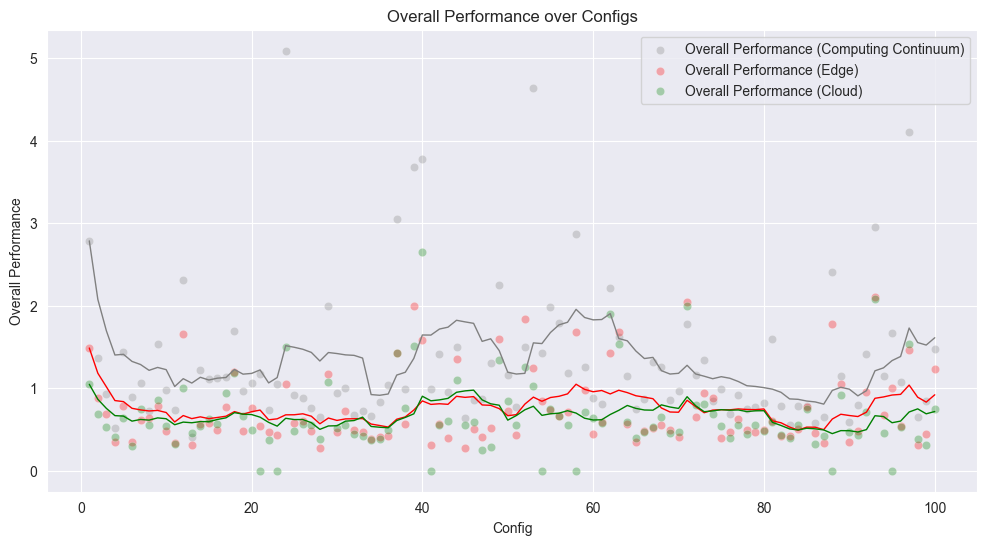

In [68]:
# Objective function * constraint_violations should give an idea of how much the objective function is affected by constraint violations
alpha_beta_filtered_data['obj_rate'] = 100 / alpha_beta_filtered_data['constraint_violations'] * alpha_beta_filtered_data['objective_func']
alpha_beta_filtered_data['obj_rate_edge'] = 100 / alpha_beta_filtered_data['constraint_violations_edge'] * alpha_beta_filtered_data['objective_edge']
alpha_beta_filtered_data['obj_rate_cloud'] = 100 / alpha_beta_filtered_data['constraint_violations_cloud'] * alpha_beta_filtered_data['objective_cloud']

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='obj_rate', data=alpha_beta_filtered_data, label='Overall Performance (Computing Continuum)', color='gray', alpha=0.3)
sns.scatterplot(x='config_number', y='obj_rate_edge', data=alpha_beta_filtered_data, label='Overall Performance (Edge)', color='red', alpha=0.3)
sns.scatterplot(x='config_number', y='obj_rate_cloud', data=alpha_beta_filtered_data, label='Overall Performance (Cloud)', color='green', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['obj_rate'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='gray', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['obj_rate_edge'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='red', lw=1)
sns.lineplot(x='config_number', y=alpha_beta_filtered_data['obj_rate_cloud'].rolling(window=window_size, min_periods=1).mean(), data=alpha_beta_filtered_data, color='green', lw=1)

title = 'Overall Performance over Configs'
plt.title(title)
plt.xlabel('Config')
plt.ylabel('Overall Performance')
plt.savefig(f'images/{title.replace(" ", "_")}')
plt.show()